Какие слова в этом тексте попали в топ 10 самых частотных. (Опционально - постройте облако тегов для лемматизированного текста)

(-0.5, 399.5, 199.5, -0.5)

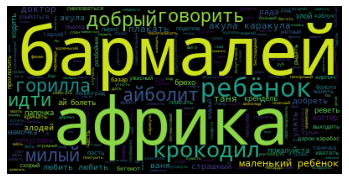

In [35]:

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
 
data = pd.read_csv("/Users/karina/Desktop/cl 2021-22/КЛ/11_uptotest_KL_09:12.02.22/Часть-первая.txt.csv")
text = ' '.join(data['Часть первая'])

text = word_tokenize(text)
lemmatizer = pymorphy2.MorphAnalyzer()
 
def lemmatize_text(tokens):
    text_new=''
    for word in tokens:
        word = lemmatizer.parse(word)
        text_new = text_new + ' ' + word[0].normal_form
    return text_new
text = lemmatize_text(text)
cloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(cloud)
plt.axis('off')



Определите, какая глагольная форма наиболее характерна для первого фрагмента текста. Для этого вычислите tf.idf для глагольных форм для этого фрагмента: Маленькие дети!Ни за что на светеНе ходите в Африку,В Африку гулять!В Африке акулы,В Африке гориллы,В Африке большиеЗлые крокодилыБудут вас кусать,Бить и обижать,-Не ходите, дети,В Африку гулять.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["Маленькие дети!", "Ни за что на свете", "Не ходите в Африку",
"В Африку гулять!", "В Африке акулы,", "В Африке гориллы",
"В Африке большие", "Злые крокодилы", "Будут вас кусать",
"Бить и обижать", "Не ходите, дети,В Африку гулять."]

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'маленькие': 14, 'дети': 9, 'ни': 17, 'за': 10, 'что': 21, 'на': 15, 'свете': 19, 'не': 16, 'ходите': 20, 'африку': 2, 'гулять': 8, 'африке': 1, 'акулы': 0, 'гориллы': 7, 'большие': 4, 'злые': 11, 'крокодилы': 12, 'будут': 5, 'вас': 6, 'кусать': 13, 'бить': 3, 'обижать': 18}
[2.79175947 2.09861229 2.09861229 2.79175947 2.79175947 2.79175947
 2.79175947 2.79175947 2.38629436 2.38629436 2.79175947 2.79175947
 2.79175947 2.79175947 2.79175947 2.79175947 2.38629436 2.79175947
 2.79175947 2.79175947 2.38629436 2.79175947]


Определите, какое слово (лемма) в приведенном ниже фрагменте более тематично "Но папочка и мамочка уснули вечерком,А Танечка и Ванечка — в Африку бегом, —В Африку!В Африку! "

In [54]:

# from nltk.stem import SnowballStemmer
# snowball = SnowballStemmer(language="russian") 
# snowball.stem("уснули")
import nltk
from nltk.tokenize import word_tokenize
# импортируем лемматайзер
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
text = "Но папочка и мамочка уснули вечерком, А Танечка и Ванечка — в Африку бегом, — В Африку! В Африку!"
tokens = nltk.word_tokenize(text)
for word in tokens:
    # преобразуем каждое слово с помощью лемматайзера
    print(lemmatizer.lemmatize(word))  

Но
папочка
и
мамочка
уснули
вечерком
,
А
Танечка
и
Ванечка
—
в
Африку
бегом
,
—
В
Африку
!
В
Африку
!


In [98]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
 
lemmatizer = WordNetLemmatizer()
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

sentence = ('Но папочка и мамочка уснули вечерком,А Танечка и Ванечка — в Африку бегом, — В Африку!В Африку!')

pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 
 
print(pos_tagged)

# wordnet_tagged = sentence(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
# print(wordnet_tagged)

[('Но', 'JJ'), ('папочка', 'NNP'), ('и', 'NNP'), ('мамочка', 'NNP'), ('уснули', 'NNP'), ('вечерком', 'NNP'), (',', ','), ('А', 'NNP'), ('Танечка', 'NNP'), ('и', 'NNP'), ('Ванечка', 'NNP'), ('—', 'NNP'), ('в', 'NNP'), ('Африку', 'NNP'), ('бегом', 'NNP'), (',', ','), ('—', 'NNP'), ('В', 'NNP'), ('Африку', 'NN'), ('!', '.'), ('В', 'JJ'), ('Африку', 'NN'), ('!', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/karina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Определите, какая цепочка из двух частей речи наиболее частотная

Постройте синтаксические деревья для: (1) В Африке акулы,В Африке гориллы,В Африке большиеЗлые крокодилы, (2) В Африке акулы,В Африке гориллы,В Африке большиеЗлые крокодилыБудут вас кусать,Бить и обижать,-Не ходите, дети,В Африку гулять.

In [57]:
from ufal.udpipe import Model, Pipeline #импортируем нужные части из модуля
UDPIPE_MODEL_FN = "model_ru.udpipe"
!wget -O {UDPIPE_MODEL_FN} 'https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true'
model = Model.load(UDPIPE_MODEL_FN) # загружаем модель, сохраняем в переменную model

import nltk
from nltk import DependencyGraph, Tree 
sent = 'В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы'

pipeline = Pipeline(model, 'generic_tokenizer', '','','')
parsed = pipeline.process(sent) # функция process сделает синтаксический анализ

print(parsed) # печатаем результат

def conllu_to_list(parser_result): 
# аргумент - это conllu-файл, который получили в результате синтаксического анализа 
    sents = []
    for sent in parser_result.split('\n\n'):

        # убираем коменты
        sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')])
        
        # заменяем регистр для root
        sent = sent.replace('\troot\t', '\tROOT\t')
        sents.append(sent)
    return sents
ud = conllu_to_list(parsed) # превратили в лист

# ud[0]
# ud_graph = DependencyGraph(tree_str=ud[0])
# ud_graph
ud_tree = ud_graph.tree()
print(ud_tree.pretty_print())

--2022-02-14 14:48:43--  https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true
Распознаётся github.com (github.com)… 140.82.121.4
Подключение к github.com (github.com)|140.82.121.4|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [переход]
--2022-02-14 14:48:43--  https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Повторное использование соединения с github.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [переход]
--2022-02-14 14:48:44--  https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801

# newdoc
# newpar
# sent_id = 1
# text = В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы Будут вас кусать, Бить и обижать,-Не ходите, дети, В Африку гулять.
1	В	В	ADP	IN	_	2	case	_	_
2	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	14	obl	_	_
3	акулы	АКУЛА	NOUN	NN	Animacy=Anim|Case=Nom|Gender=Fem|Number=Plur	2	appos	_	SpaceAfter=No
4	,	,	PUNCT	,	_	3	punct	_	_
5	В	В	ADP	IN	_	6	case	_	_
6	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	7	nmod	_	_
7	гориллы	гориллы	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	2	appos	_	SpaceAfter=No
8	,	,	PUNCT	,	_	2	punct	_	_
9	В	В	ADP	IN	_	10	case	_	_
10	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	14	obl	_	_
11	большие	БОЛЬШОЙ	ADJ	JJS	Animacy=Inan|Case=Nom|Degree=Sup|Number=Plur	10	amod	_	_
12	Злые	Злые	ADJ	JJL	Animacy=Inan|Case=Nom|Number=Plur	10	amod	_	_
13	крокодилы	крокодИЛА	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	14	nsubj	_	_
14	Будут	БЫТЬ	V

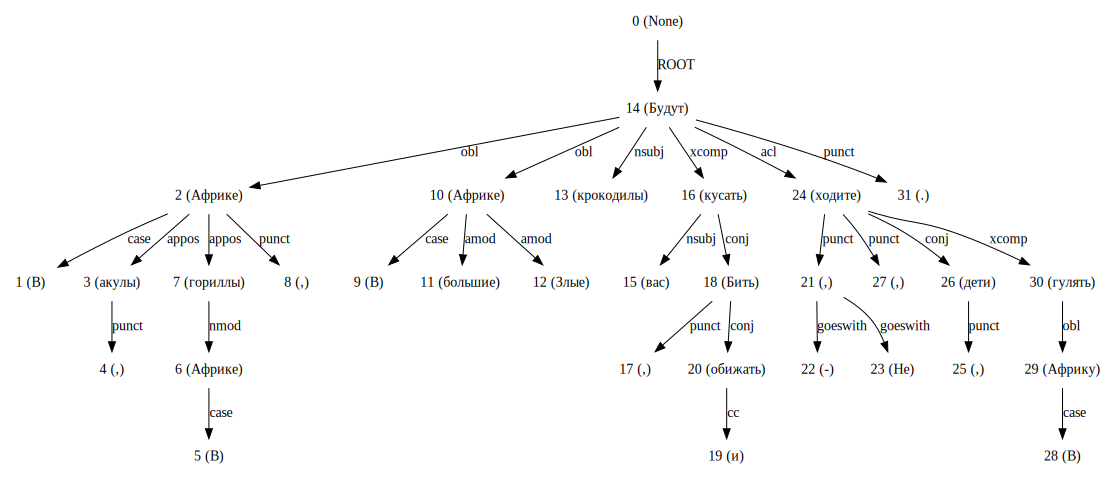

In [56]:
sent = 'В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы Будут вас кусать, Бить и обижать,-Не ходите, дети, В Африку гулять.'

pipeline = Pipeline(model, 'generic_tokenizer', '','','')
parsed = pipeline.process(sent) # функция process сделает синтаксический анализ

print(parsed) # печатаем результат

def conllu_to_list(parser_result): 
# аргумент - это conllu-файл, который получили в результате синтаксического анализа 
    sents = []
    for sent in parser_result.split('\n\n'):

        # убираем коменты
        sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')])
        
        # заменяем регистр для root
        sent = sent.replace('\troot\t', '\tROOT\t')
        sents.append(sent)
    return sents
ud = conllu_to_list(parsed) # превратили в лист

ud[0]
ud_graph = DependencyGraph(tree_str=ud[0])
ud_graph

# ud_tree = ud_graph.tree()
# print(ud_tree.pretty_print())

In [53]:
list(ud_graph.triples())


[(('Африке', 'PROPN'), 'case', ('В', 'ADP')),
 (('Африке', 'PROPN'), 'appos', ('акулы', 'NOUN')),
 (('акулы', 'NOUN'), 'punct', (',', 'PUNCT')),
 (('Африке', 'PROPN'), 'appos', ('гориллы', 'NOUN')),
 (('гориллы', 'NOUN'), 'nmod', ('Африке', 'PROPN')),
 (('Африке', 'PROPN'), 'case', ('В', 'ADP')),
 (('Африке', 'PROPN'), 'punct', (',', 'PUNCT')),
 (('Африке', 'PROPN'), 'appos', ('крокодилы', 'NOUN')),
 (('крокодилы', 'NOUN'), 'nmod', ('Африке', 'PROPN')),
 (('Африке', 'PROPN'), 'case', ('В', 'ADP')),
 (('Африке', 'PROPN'), 'amod', ('большие', 'ADJ')),
 (('Африке', 'PROPN'), 'amod', ('Злые', 'ADJ'))]

Определите, является ли глагол "будут" вершиной для какой-нибудь словоформы, с какими словояормами "будут" связано, каким синтаксическим отношением.